#### EDA For Healthcare Stroke Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import missingno as msno
import autoreload
import matplotlib.pyplot as plt
import os 
import csv
import sys

from collections import defaultdict, Counter

from sklearn.preprocessing import LabelEncoder #Provide Labeling Tranformation to Categorical data
from sklearn.tree import DecisionTreeClassifier # Classifier to create an instance of a model
from sklearn.impute import SimpleImputer #Impute Missing values with their mean 
from sklearn.model_selection import train_test_split #Split Dataset to perform Unbiased Evaluation of model

sb.set_style("darkgrid")
sb.set(font_scale=1.2)

pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 100)

%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
df = pd.read_csv("D:\Open Classroom\Data Files\Healthcare Stroke Data\healthcare-dataset-stroke-data.csv")
df["age"] = df["age"].astype("int64")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   int64  
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 479.2+ KB


In [4]:
df.shape

(5110, 12)

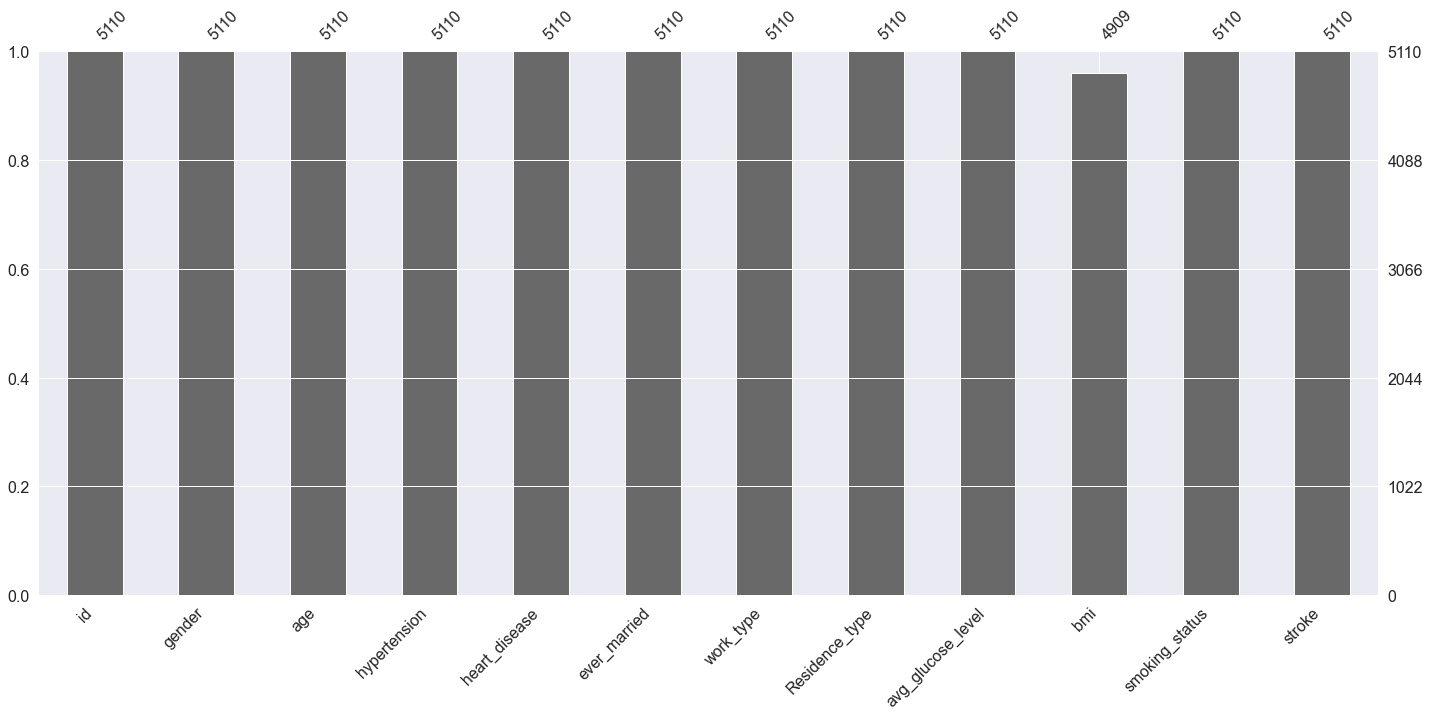

In [5]:
msno.bar(df)

#### Do away with missing values

In [6]:
df["bmi"] = df["bmi"].replace(np.nan, 0)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,0.0,never smoked,1
2,31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [7]:
round(df.describe(include = "all"), -1)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.0,5110,5110.0,5110.0,5110.0,5110,5110,5110,5110.0,5110.0,5110,5110.0
unique,NaN,3,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,NaN,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,NaN,2994,NaN,NaN,NaN,3353,2925,2596,NaN,NaN,1892,NaN
mean,36520.0,NaN,40.0,0.0,0.0,NaN,NaN,NaN,110.0,30.0,NaN,0.0
std,21160.0,NaN,20.0,0.0,0.0,NaN,NaN,NaN,50.0,10.0,NaN,0.0
min,70.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,60.0,0.0,NaN,0.0
25%,17740.0,NaN,20.0,0.0,0.0,NaN,NaN,NaN,80.0,20.0,NaN,0.0
50%,36930.0,NaN,40.0,0.0,0.0,NaN,NaN,NaN,90.0,30.0,NaN,0.0
75%,54680.0,NaN,60.0,0.0,0.0,NaN,NaN,NaN,110.0,30.0,NaN,0.0


Text(0.5, 1.0, 'Pearson Standard Correlation \nof Coefficients / Columns')

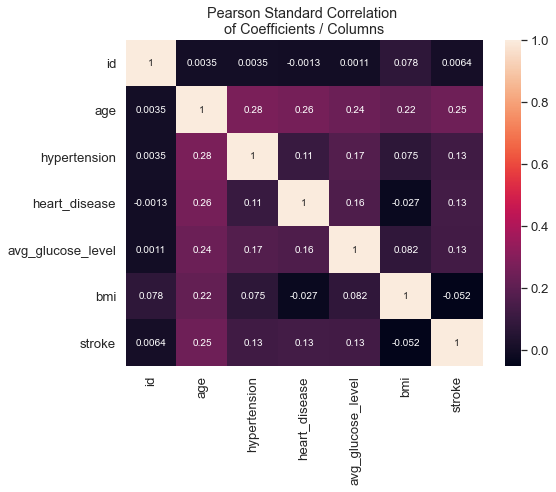

In [8]:
plt.figure(figsize = (8, 6))
sb.heatmap(df.corr(), annot = True)
plt.title("Pearson Standard Correlation \nof Coefficients / Columns")

In [9]:
hyper = df.groupby("gender").agg({"hypertension":"mean"})
round(hyper, 2)

,hypertension
gender,
Female,0.09
Male,0.10
Other,0.00


In [10]:
X = df[["gender", "age"]] #Predictor [independent] Variable
y = df["work_type"] # Target [dependent] Variable

#Using the LabelEncoder Provide label for categorical data which
#in this case is the gender series

le = LabelEncoder()
X = X.apply(le.fit_transform)

model = DecisionTreeClassifier()
model.fit(X, y, sample_weight = 0.33)

#prediction = model.predict([[1, 40]])
#prediction

for i in range(2):
    for j in range(100):
        prediction = model.predict([[i, j]])
        out = str(i) + ", " + str(j) + ", " + str(prediction)
        print(out)
        break


0, 0, ['children']
1, 0, ['children']


In [16]:
# Train and Test the model

#X_train, X_test, y_train, y_test = train_test_split()

In [17]:
X = df[["bmi", "stroke"]]
y = df["smoking_status"]

model = DecisionTreeClassifier()

model.fit(X, y)

pred = model.predict([[12.89, 0]])
pred

for i in range(int(100.0)):
    for j in range(2):
        pred = model.predict([[i, j]])
        out = str(i) + ", " + str(j) + ", " + str(pred)
        print(out)
    break

0, 0, ['smokes']
0, 1, ['Unknown']


In [18]:
df["work_type"].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [19]:
pd.get_dummies(df["gender"]) #Performing One-Hot Encoding to the module 'gender'

,Female,Male,Other
0,0,1,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
5105,1,0,0
5106,1,0,0
5107,1,0,0
5108,0,1,0
